**Author:** Sydney Crandall

**Last Edited:** June 1st, 2022

In [1]:
# imports
import pandas as pd
import numpy as np
import cluster
import math
import munge
import datetime as dt
from metpy.units import units
import visualizations as vis
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sb
import gapstat as gs

In [2]:
# run functions from munge.py
elp = munge.from_raw("elpasoRaw.csv")
elp = munge.add_season_rearrange(elp)
elp = munge.replace_month_hour(elp)
elp = munge.wet_bulb(elp)
elpHourly = munge.to_hourly(elp)
elpDaily = munge.to_daily(elpHourly)

elpHourly.to_csv("elpHourly.csv")
elpDaily.to_csv("elpDaily.csv")

In [3]:
# run the functions from cluster.py
included_cols = ['drytemp_max', 'drytemp_min', 'dewtemp_avg','wetbulb_avg','RH_max',
                 'RH_min''wspd_max', 'wspd_min','wdir_avg','prec_inch','drytemp_max_hour', 'drytemp_min_hour', 'pres_tend']
elpData, elpScaledData = cluster.scale_and_convert_to_numpy(elpDaily, included_cols)

#init_centroids = cluster.plus_plus(albScaledData, 4)
k = 3
elpScaledCentroids, elpIdx = cluster.cluster_data(k, elpScaledData)

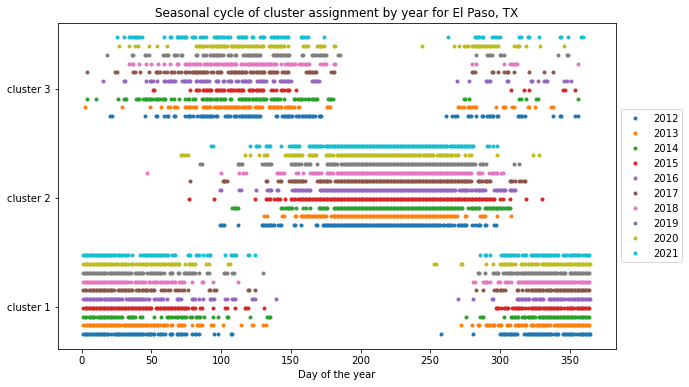

In [4]:
cluster_label_list = ["cluster 1", "cluster 2", "cluster 3", "cluster 4"]
vis.seasonal_assignment_by_year("El Paso, TX", cluster_label_list[0:3], 3, elpDaily, elpIdx)

In [5]:
elpRaw = munge.from_raw("elpasoRaw.csv")
elpRaw.isnull().sum()

dewtemp_F      3951
drytemp_F      3818
prec_inch     38616
RH             3806
pres_mbar      4049
wetbulb_F      4076
wdir          10609
wgust_mph    108207
wspd_mph       3968
datetime          0
hour              0
month             0
dtype: int64

In [6]:
elpRaw.shape

(123912, 12)

In [7]:
elpDaily['cluster'] = elpIdx

In [8]:
elpDailyGroups = elpDaily.groupby("cluster")

In [9]:
elpDailyGroups.get_group(1).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.0
mean,1.881997,63.219364,39.242813,24.559757,39.767776,60.181164,23.858927,886.650513,881.019287,14.399016,0.719743,136.427383,0.008880,13.574130,6.619516,0.984115,9.158850,10.974281,-1.185325,1.0
std,1.240739,9.550632,7.836111,9.680896,5.970263,18.149513,13.287729,4.305131,4.580818,6.561700,1.722834,49.678135,0.043588,3.339851,5.568078,3.681353,6.807655,7.732426,5.957031,0.0
min,1.000000,33.000000,14.000000,-7.000000,20.000000,13.000000,4.000000,874.000000,865.000000,3.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000,1.0
25%,1.000000,57.000000,34.000000,18.000000,35.000000,46.000000,14.000000,884.000000,878.000000,9.500000,0.000000,97.250000,0.000000,13.000000,4.000000,0.000000,6.000000,1.000000,-6.000000,1.0
50%,1.000000,64.000000,39.000000,25.000000,40.000000,59.000000,21.000000,887.000000,881.000000,13.000000,0.000000,130.000000,0.000000,15.000000,6.000000,0.000000,9.000000,15.000000,-4.000000,1.0
75%,2.000000,70.000000,45.000000,31.000000,44.000000,74.000000,30.000000,889.000000,884.000000,17.000000,0.000000,170.000000,0.000000,15.000000,6.000000,0.000000,9.000000,16.000000,5.000000,1.0
max,4.000000,88.500000,61.000000,51.000000,54.000000,100.000000,80.000000,900.000000,895.000000,48.000000,10.000000,275.000000,0.590000,23.000000,23.000000,23.000000,23.000000,23.000000,17.000000,1.0


In [10]:
elpDailyGroups.get_group(2).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.0
mean,3.230000,91.189644,69.453217,49.830715,62.064999,60.419998,22.389643,883.851074,879.203186,15.978929,0.862143,146.098572,0.028814,14.065714,5.415714,2.505000,7.269286,14.146429,-3.352857,2.0
std,0.607282,7.996264,7.214015,8.245554,4.512638,18.116083,12.058879,2.589864,2.601266,5.180073,1.780571,41.243240,0.111709,1.663198,4.866925,6.168353,4.877299,4.851253,3.519948,0.0
min,1.000000,59.000000,48.000000,22.000000,50.000000,18.000000,3.000000,876.000000,869.000000,6.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,2.0
25%,3.000000,87.000000,65.000000,44.000000,59.000000,46.500000,14.000000,882.000000,877.500000,13.000000,0.000000,115.000000,0.000000,13.000000,3.000000,0.000000,6.000000,15.000000,-5.000000,2.0
50%,3.000000,92.000000,71.000000,51.000000,63.000000,59.000000,19.500000,884.000000,879.000000,15.000000,0.000000,141.000000,0.000000,15.000000,4.000000,0.000000,7.000000,15.000000,-4.000000,2.0
75%,4.000000,97.000000,75.000000,56.000000,66.000000,75.000000,27.000000,886.000000,881.000000,19.000000,0.000000,173.000000,0.000000,15.000000,5.000000,0.000000,8.000000,16.000000,-4.000000,2.0
max,4.000000,109.500000,85.000000,67.000000,71.000000,100.000000,84.000000,894.000000,888.000000,40.000000,10.000000,275.000000,1.610000,17.000000,23.000000,23.000000,23.000000,23.000000,9.000000,2.0


In [11]:
elpDailyGroups.get_group(3).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.0
mean,2.291085,82.715363,59.466702,22.472610,48.860367,31.273899,10.021482,881.205139,876.207825,21.529537,2.981740,215.765839,0.000360,13.808808,6.555317,0.155747,9.195489,11.877551,-1.583244,3.0
std,0.866408,10.659270,9.846761,9.040294,5.398514,13.684533,6.133093,3.078593,3.140785,6.978620,3.235416,41.452927,0.003956,2.342677,6.094410,1.505694,6.545820,6.673172,5.091444,0.0
min,1.000000,46.000000,28.000000,-3.000000,28.000000,6.000000,1.000000,872.000000,865.000000,7.000000,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000,3.0
25%,2.000000,76.000000,52.000000,16.000000,46.000000,21.000000,6.000000,879.000000,874.000000,16.500000,0.000000,190.000000,0.000000,13.000000,4.000000,0.000000,6.000000,5.000000,-5.000000,3.0
50%,2.000000,83.000000,59.000000,22.000000,49.000000,29.000000,8.000000,881.000000,876.000000,21.000000,3.000000,223.000000,0.000000,14.000000,5.000000,0.000000,7.000000,15.000000,-4.000000,3.0
75%,3.000000,90.000000,66.000000,28.000000,52.000000,39.000000,12.000000,883.000000,878.000000,25.000000,5.000000,247.500000,0.000000,15.000000,6.000000,0.000000,9.000000,16.000000,4.000000,3.0
max,4.000000,107.000000,87.000000,56.000000,66.000000,86.000000,42.000000,894.000000,887.000000,47.000000,15.500000,324.000000,0.075000,17.000000,23.000000,19.000000,23.000000,23.000000,16.000000,3.0
